# **Caso Machine Learning League of legends**

Hemos seleccionado un dataset de League of Legends para analizar los datos y explorar la posibilidad de aplicar modelos de machine learning con el fin de predecir resultados.

En cada partida de League of Legends, dos equipos de cinco jugadores (denominados equipo azul y equipo rojo) se enfrentan en un campo de batalla. El objetivo es destruir el Nexus enemigo, que se encuentra en la base del equipo contrario. Para alcanzar este objetivo, los jugadores deben navegar por tres carriles principales (top, mid, bot), así como por la jungla que conecta estas rutas. Cada jugador asume un rol específico, y el éxito del equipo depende de las decisiones estratégicas y la habilidad individual de los jugadores.

Los datos a utilizar corresponden a más de 25,000 partidas clasificatorias en el modo SOLO QUEUE dentro del rango de ELO Platino. Cada partida es única y está identificada por un gameId, lo que permite acceder a datos adicionales utilizando la API de Riot Games. Los datos incluyen características recopiladas en diferentes momentos del juego, desde los primeros 10 minutos hasta el final, proporcionando un total de más de 240,000 registros temporales.

El objetivo de este análisis es explorar las 59 características disponibles para el equipo azul, que incluyen métricas como asesinatos, muertes, oro, experiencia, nivel, entre otras. También se consideran valores booleanos categóricos que indican ciertas condiciones del juego. La variable objetivo hasWon permite abordar un problema de clasificación para predecir el resultado de la partida, mientras que el atributo gameDuration se puede utilizar para predecir la duración del juego.

Este análisis permitirá comprender mejor los factores que influyen en los resultados de las partidas y ofrecerá la oportunidad de realizar ingeniería de características para obtener insights más profundos. La riqueza de los datos abre la puerta a diversas aplicaciones, como la predicción de resultados de juegos o la optimización de estrategias dentro de League of Legends.

| Dato                         | Descripción                                              |
|------------------------------|----------------------------------------------------------|
| gameId                       | Identificador único de la partida.                       |
| gameDuration                 | Duración total de la partida en segundos.                |
| hasWon                       | Indica si el equipo ganó la partida (1) o no (0).        |
| frame                        | Momento específico de la partida, medido en intervalos de tiempo (por ejemplo, 10 minutos, 12 minutos, etc.). |
| goldDiff                     | Diferencia de oro entre los equipos en un momento dado.  |
| expDiff                      | Diferencia de experiencia entre los equipos.             |
| champLevelDiff               | Diferencia en los niveles de los campeones entre equipos.|
| isFirstTower                 | Indica si se destruyó la primera torre (1: sí, 0: no).   |
| isFirstBlood                 | Indica si se consiguió la primera sangre (1: sí, 0: no). |
| killedFireDrake              | Número de dragones de fuego que mató el equipo.          |
| killedWaterDrake             | Número de dragones de agua que mató el equipo.           |
| killedAirDrake               | Número de dragones de aire que mató el equipo.           |
| killedEarthDrake             | Número de dragones de tierra que mató el equipo.         |
| killedElderDrake             | Número de dragones ancianos que mató el equipo.          |
| lostFireDrake                | Número de dragones de fuego perdidos (matados por el enemigo). |
| lostWaterDrake               | Número de dragones de agua perdidos.                     |
| lostAirDrake                 | Número de dragones de aire perdidos.                     |
| lostEarthDrake               | Número de dragones de tierra perdidos.                   |
| lostElderDrake               | Número de dragones ancianos perdidos.                    |
| killedBaronNashor            | Número de veces que se mató al Barón Nashor.             |
| lostBaronNashor              | Número de veces que el enemigo mató al Barón Nashor.     |
| killedRiftHerald             | Número de veces que se mató al Heraldo de la Grieta.     |
| lostRiftHerald               | Número de veces que el enemigo mató al Heraldo de la Grieta. |
| destroyedTopInhibitor        | Número de inhibidores superiores destruidos.             |
| destroyedMidInhibitor        | Número de inhibidores centrales destruidos.              |
| destroyedBotInhibitor        | Número de inhibidores inferiores destruidos.             |
| lostTopInhibitor             | Número de inhibidores superiores perdidos.               |
| lostMidInhibitor             | Número de inhibidores centrales perdidos.                |
| lostBotInhibitor             | Número de inhibidores inferiores perdidos.               |
| destroyedTopNexusTurret      | Número de torretas superiores del nexo destruidas.       |
| destroyedMidNexusTurret      | Número de torretas centrales del nexo destruidas.        |
| destroyedBotNexusTurret      | Número de torretas inferiores del nexo destruidas.       |
| lostTopNexusTurret           | Número de torretas superiores del nexo perdidas.         |
| lostMidNexusTurret           | Número de torretas centrales del nexo perdidas.          |
| lostBotNexusTurret           | Número de torretas inferiores del nexo perdidas.         |
| destroyedTopBaseTurret       | Número de torretas superiores de la base destruidas.     |
| destroyedMidBaseTurret       | Número de torretas centrales de la base destruidas.      |
| destroyedBotBaseTurret       | Número de torretas inferiores de la base destruidas.     |
| lostTopBaseTurret            | Número de torretas superiores de la base perdidas.       |
| lostMidBaseTurret            | Número de torretas centrales de la base perdidas.        |
| lostBotBaseTurret            | Número de torretas inferiores de la base perdidas.       |
| destroyedTopInnerTurret      | Número de torretas interiores superiores destruidas.     |
| destroyedMidInnerTurret      | Número de torretas interiores centrales destruidas.      |
| destroyedBotInnerTurret      | Número de torretas interiores inferiores destruidas.     |
| lostTopInnerTurret           | Número de torretas interiores superiores perdidas.       |
| lostMidInnerTurret           | Número de torretas interiores centrales perdidas.        |
| lostBotInnerTurret           | Número de torretas interiores inferiores perdidas.       |
| destroyedTopOuterTurret      | Número de torretas exteriores superiores destruidas.     |
| destroyedMidOuterTurret      | Número de torretas exteriores centrales destruidas.      |
| destroyedBotOuterTurret      | Número de torretas exteriores inferiores destruidas.     |
| lostTopOuterTurret           | Número de torretas exteriores superiores perdidas.       |
| lostMidOuterTurret           | Número de torretas exteriores centrales perdidas.        |
| lostBotOuterTurret           | Número de torretas exteriores inferiores perdidas.       |
| kills                        | Número de asesinatos realizados por el equipo o jugador. |
| deaths                       | Número de veces que el equipo o jugador murió.           |
| assists                      | Número de asistencias realizadas por el equipo o jugador.|
| wardsPlaced                  | Número de centinelas colocados.                          |
| wardsDestroyed               | Número de centinelas destruidos.                         |
| wardsLost                    | Número de centinelas perdidos.                           |


## **Fase 1: Business Understanding**

In [1]:
import pandas as pd
import arff
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats  
from sklearn.impute import KNNImputer

# Funcion para cargar el dataset

def load_arff_dataset(filepath: str) -> pd.DataFrame:
    with open(filepath, 'r') as f:
        arff_data = arff.load(f)
    
    df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])
    
    return df

arff_file_path = '../data/01_raw/dataset'

df = load_arff_dataset(arff_file_path)

In [2]:
# Primeras 10 filas
df.head(10)

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
1,4546233126,1443000,1,12,-1306,-925,-0.6,0,1,0,...,0,0,0,0,6,11,6,28,4,6
2,4546233126,1443000,1,14,2115,2578,0.4,1,1,0,...,0,0,0,0,10,11,12,35,4,6
3,4546233126,1443000,1,16,1195,2134,0.4,1,1,0,...,0,0,1,0,10,12,12,45,6,10
4,4546233126,1443000,1,18,2931,4382,0.6,1,1,1,...,0,0,1,0,13,13,16,49,7,12
5,4546233126,1443000,1,20,6127,7606,0.8,1,1,1,...,1,0,1,0,20,14,28,63,9,13
6,4546233126,1443000,1,22,7428,7842,1.4,1,1,1,...,1,0,1,0,23,15,33,75,10,13
7,4546233126,1443000,1,24,9426,11980,1.8,1,1,2,...,1,0,1,0,26,15,36,85,11,14
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
9,4438212663,1241000,1,12,1263,1566,0.4,0,1,0,...,0,0,0,0,7,7,7,20,5,4


In [3]:
# Ultimas 10 filas
df.tail(10)

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
242562,4402156483,1774000,0,20,1440,1464,0.4,1,1,0,...,0,0,1,0,23,17,37,48,11,11
242563,4402156483,1774000,0,22,1291,634,0.2,1,1,0,...,0,0,1,0,25,20,41,54,11,12
242564,4402156483,1774000,0,24,-1321,-2549,-0.4,1,1,0,...,0,0,1,1,29,28,45,57,12,12
242565,4402156483,1774000,0,26,-4062,-5239,-0.8,1,1,1,...,0,0,1,1,30,32,47,67,14,15
242566,4402156483,1774000,0,28,-5640,-9016,-1.0,1,1,1,...,0,0,1,1,33,36,50,74,15,16
242567,4402156483,1774000,0,30,-8523,-13498,-1.6,1,1,1,...,0,0,1,1,33,41,50,80,18,17
242568,4379826739,1013000,0,10,-271,-1243,-0.2,0,1,0,...,0,0,0,0,6,5,6,18,1,2
242569,4379826739,1013000,0,12,-2013,-3493,-0.8,0,1,0,...,0,0,0,0,7,8,6,23,1,5
242570,4379826739,1013000,0,14,-2388,-4543,-0.8,0,1,0,...,0,0,0,0,10,13,9,27,5,6
242571,4379826739,1013000,0,16,-5601,-7595,-1.2,0,1,0,...,0,0,0,0,11,17,10,31,6,10


In [4]:
# Columna y tipo de dato
columnas = df.columns
for columna in columnas:
    print(f'{columna} es de tipo {df[columna].dtype}')

gameId es de tipo int64
gameDuration es de tipo int64
hasWon es de tipo int64
frame es de tipo int64
goldDiff es de tipo int64
expDiff es de tipo int64
champLevelDiff es de tipo float64
isFirstTower es de tipo int64
isFirstBlood es de tipo int64
killedFireDrake es de tipo int64
killedWaterDrake es de tipo int64
killedAirDrake es de tipo int64
killedEarthDrake es de tipo int64
killedElderDrake es de tipo int64
lostFireDrake es de tipo int64
lostWaterDrake es de tipo int64
lostAirDrake es de tipo int64
lostEarthDrake es de tipo int64
lostElderDrake es de tipo int64
killedBaronNashor es de tipo int64
lostBaronNashor es de tipo int64
killedRiftHerald es de tipo int64
lostRiftHerald es de tipo int64
destroyedTopInhibitor es de tipo int64
destroyedMidInhibitor es de tipo int64
destroyedBotInhibitor es de tipo int64
lostTopInhibitor es de tipo int64
lostMidInhibitor es de tipo int64
lostBotInhibitor es de tipo int64
destroyedTopNexusTurret es de tipo int64
destroyedMidNexusTurret es de tipo i

In [5]:
num_filas = df.shape[0]
print(f'El dataset tiene {num_filas} filas.')

El dataset tiene 242572 filas.


 # Hipótesis

De acuerdo con los datos que se pueden apreciar, se podría trabajar bajo las siguientes hipótesis:

* Benjamín: ¿Cómo afectan los objetivos neutrales (Dragones, Barón y Heraldo) a la victoria del equipo?
* Andrus: ¿el numero de asesinatos (Kills) y asistencias (Assist) durante los primeros 10 minutos (frame) tiene un impacto significativo en la victoria de un              equipo?
* Ricardo: ¿Conseguir la Primera Sangre incrementa las posibilidades de ganar la partida?


## **Fase 2: Data Understanding**

### Verificación de datos nulos

In [6]:
df.isnull().sum()

gameId                     0
gameDuration               0
hasWon                     0
frame                      0
goldDiff                   0
expDiff                    0
champLevelDiff             0
isFirstTower               0
isFirstBlood               0
killedFireDrake            0
killedWaterDrake           0
killedAirDrake             0
killedEarthDrake           0
killedElderDrake           0
lostFireDrake              0
lostWaterDrake             0
lostAirDrake               0
lostEarthDrake             0
lostElderDrake             0
killedBaronNashor          0
lostBaronNashor            0
killedRiftHerald           0
lostRiftHerald             0
destroyedTopInhibitor      0
destroyedMidInhibitor      0
destroyedBotInhibitor      0
lostTopInhibitor           0
lostMidInhibitor           0
lostBotInhibitor           0
destroyedTopNexusTurret    0
destroyedMidNexusTurret    0
destroyedBotNexusTurret    0
lostTopNexusTurret         0
lostMidNexusTurret         0
lostBotNexusTu

Podemos notar que dentro del dataset no existen valores nulos.

In [7]:
df.nunique()

gameId                     24912
gameDuration                2074
hasWon                         2
frame                         24
goldDiff                   28629
expDiff                    28949
champLevelDiff               123
isFirstTower                   2
isFirstBlood                   2
killedFireDrake                5
killedWaterDrake               5
killedAirDrake                 5
killedEarthDrake               5
killedElderDrake               4
lostFireDrake                  5
lostWaterDrake                 5
lostAirDrake                   5
lostEarthDrake                 5
lostElderDrake                 4
killedBaronNashor              5
lostBaronNashor                5
killedRiftHerald               3
lostRiftHerald                 3
destroyedTopInhibitor          4
destroyedMidInhibitor          4
destroyedBotInhibitor          5
lostTopInhibitor               4
lostMidInhibitor               4
lostBotInhibitor               5
destroyedTopNexusTurret        2
destroyedM

In [8]:
# Lista para almacenar los nombres de las columnas con números negativos
columnas_con_negativos = []

# Iterar sobre cada columna y verificar si contiene números negativos
for columna in df.columns:
    if (df[columna] < 0).any():
        columnas_con_negativos.append(columna)

print("Columnas con números negativos:", columnas_con_negativos)

Columnas con números negativos: ['goldDiff', 'expDiff', 'champLevelDiff']


Las columnas que contienen números negativos están correctas, ya que dentro del juego es posible que existan diferencias negativas tanto en oro como en experiencia o en el nivel del personaje.

### Medidas de Posición

In [9]:
df.describe()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
count,2.425720e+05,2.425720e+05,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,...,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000
mean,4.501480e+09,1.785494e+06,0.498128,19.811264,-11.413811,-215.019351,-0.026517,0.617709,0.998627,0.295908,...,0.369997,0.376795,0.368822,0.355243,16.391381,16.342220,21.166029,56.833530,10.487031,10.263077
std,5.331693e+07,3.761901e+05,0.499998,7.197339,5438.051920,5261.880802,0.772366,0.485948,0.037026,0.509759,...,0.482805,0.484584,0.482487,0.478588,9.660237,9.697602,16.055645,58.734777,8.713549,8.736323
min,4.357970e+09,5.490000e+05,0.000000,10.000000,-21578.000000,-32484.000000,-4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,4.463051e+09,1.532000e+06,0.000000,14.000000,-3420.250000,-3148.000000,-0.600000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,25.000000,4.000000,4.000000
50%,4.529395e+09,1.774000e+06,0.000000,18.000000,24.000000,-123.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,15.000000,15.000000,17.000000,40.000000,8.000000,8.000000
75%,4.543718e+09,2.025000e+06,1.000000,24.000000,3409.000000,2772.000000,0.400000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,22.000000,22.000000,30.000000,63.000000,15.000000,14.000000
max,4.547671e+09,3.428000e+06,1.000000,56.000000,23432.000000,43304.000000,3.800000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,69.000000,72.000000,137.000000,1014.000000,115.000000,107.000000


In [10]:
for dato in df.columns:
    media = df[dato].mean()
    moda = df[dato].mode()[0] if not df[dato].mode().empty else 'No hay moda'
    mediana = df[dato].median()
    desviacion = df[dato].std()
    print(f"Columna: {dato}")
    print(f" - Media: {media}")
    print(f" - Moda: {moda}")
    print(f" - Mediana: {mediana}")
    print(f" - Desviación Estándar: {desviacion}\n")


Columna: gameId
 - Media: 4501479546.200077
 - Moda: 4361896408
 - Mediana: 4529395251.0
 - Desviación Estándar: 53316927.63205334

Columna: gameDuration
 - Media: 1785493.8945962435
 - Moda: 1775000
 - Mediana: 1774000.0
 - Desviación Estándar: 376190.06291678606

Columna: hasWon
 - Media: 0.4981283907458404
 - Moda: 0
 - Mediana: 0.0
 - Desviación Estándar: 0.4999975276843313

Columna: frame
 - Media: 19.811264284418648
 - Moda: 10
 - Mediana: 18.0
 - Desviación Estándar: 7.197338964616284

Columna: goldDiff
 - Media: -11.413811157099747
 - Moda: 647
 - Mediana: 24.0
 - Desviación Estándar: 5438.051920127789

Columna: expDiff
 - Media: -215.01935095559256
 - Moda: -589
 - Mediana: -123.0
 - Desviación Estándar: 5261.880802086872

Columna: champLevelDiff
 - Media: -0.0265166630938443
 - Moda: 0.0
 - Mediana: 0.0
 - Desviación Estándar: 0.7723658247149056

Columna: isFirstTower
 - Media: 0.6177093811322
 - Moda: 1
 - Mediana: 1.0
 - Desviación Estándar: 0.4859480168703304

Columna: isF

### Gráficos

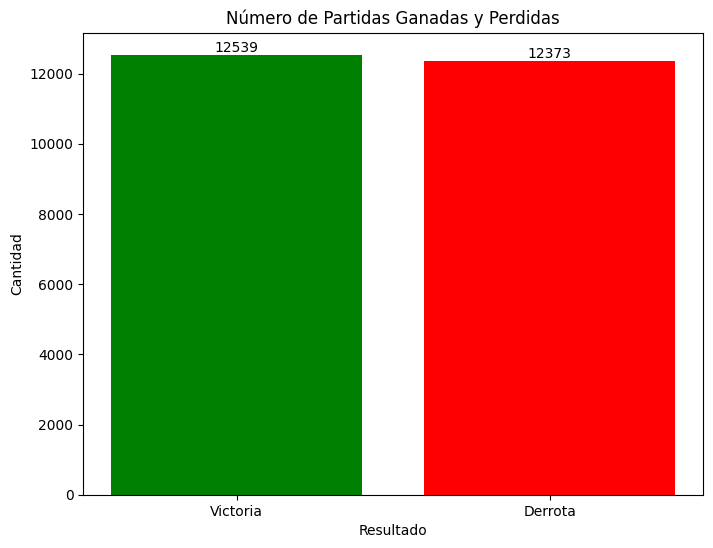

In [11]:
# Agrupar por 'gameId' y sumar las victorias
resultados_por_juego = df.groupby('gameId')['hasWon'].sum().reset_index()

# Determinar si la partida fue ganada o perdida
resultados_por_juego['Resultado'] = resultados_por_juego['hasWon'].apply(lambda x: 'Victoria' if x > 0 else 'Derrota')

# Contar el número de partidas ganadas y perdidas
conteo_resultados = resultados_por_juego['Resultado'].value_counts().reset_index()
conteo_resultados.columns = ['Resultado', 'Cantidad']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
barras = plt.bar(conteo_resultados['Resultado'], conteo_resultados['Cantidad'], color=['green', 'red'])

# Añadir los números encima de las barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2.0, altura, int(altura), ha='center', va='bottom')

plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.title('Número de Partidas Ganadas y Perdidas')
plt.show()


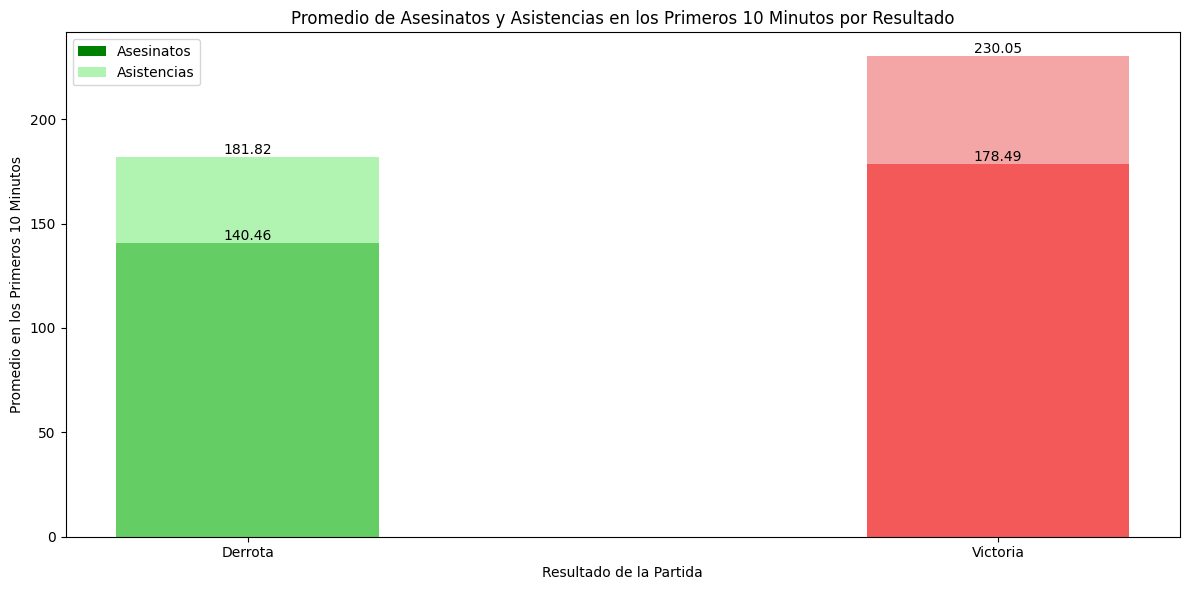

Total de partidas analizadas: 24912
Victorias: 12539 (50.33%)
Derrotas: 12373 (49.67%)

Estadísticas de los primeros 10 minutos:
                kills     assists
Resultado                        
Derrota    140.463267  181.817506
Victoria   178.494138  230.054869

Correlación entre asesinatos y victoria: 0.4233
Correlación entre asistencias y victoria: 0.3971


In [12]:
# Filtrar los datos para los primeros 10 minutos (600 segundos)
df_early = df[df['frame'] <= 600]

# Agrupar por 'gameId' y sumar kills, assists y hasWon
early_game_stats = df_early.groupby('gameId').agg({
    'kills': 'sum',
    'assists': 'sum',
    'hasWon': 'sum'
}).reset_index()

# Determinar si la partida fue ganada o perdida
early_game_stats['Resultado'] = early_game_stats['hasWon'].apply(lambda x: 'Victoria' if x > 0 else 'Derrota')

# Calcular la media de kills y assists para partidas ganadas y perdidas
mean_stats = early_game_stats.groupby('Resultado')[['kills', 'assists']].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))

# Barras para kills
barras_kills = plt.bar(mean_stats['Resultado'], mean_stats['kills'], width=0.35, label='Asesinatos', color=['green', 'red'])
# Barras para assists
barras_assists = plt.bar(mean_stats['Resultado'], mean_stats['assists'], width=0.35, label='Asistencias', color=['lightgreen', 'lightcoral'], alpha=0.7)

# Añadir los números encima de las barras
for barras in [barras_kills, barras_assists]:
    for barra in barras:
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width() / 2.0, altura, f'{altura:.2f}', ha='center', va='bottom')

plt.xlabel('Resultado de la Partida')
plt.ylabel('Promedio en los Primeros 10 Minutos')
plt.title('Promedio de Asesinatos y Asistencias en los Primeros 10 Minutos por Resultado')
plt.legend()

plt.tight_layout()
plt.show()

# Calcular y mostrar estadísticas adicionales
total_games = len(early_game_stats)
victories = early_game_stats['Resultado'].value_counts()['Victoria']
defeats = total_games - victories

print(f"Total de partidas analizadas: {total_games}")
print(f"Victorias: {victories} ({victories/total_games*100:.2f}%)")
print(f"Derrotas: {defeats} ({defeats/total_games*100:.2f}%)")

print("\nEstadísticas de los primeros 10 minutos:")
print(early_game_stats.groupby('Resultado')[['kills', 'assists']].mean())

# Calcular la correlación entre kills/assists y victoria
correlation_kills = early_game_stats['kills'].corr(early_game_stats['hasWon'])
correlation_assists = early_game_stats['assists'].corr(early_game_stats['hasWon'])

print(f"\nCorrelación entre asesinatos y victoria: {correlation_kills:.4f}")
print(f"Correlación entre asistencias y victoria: {correlation_assists:.4f}")

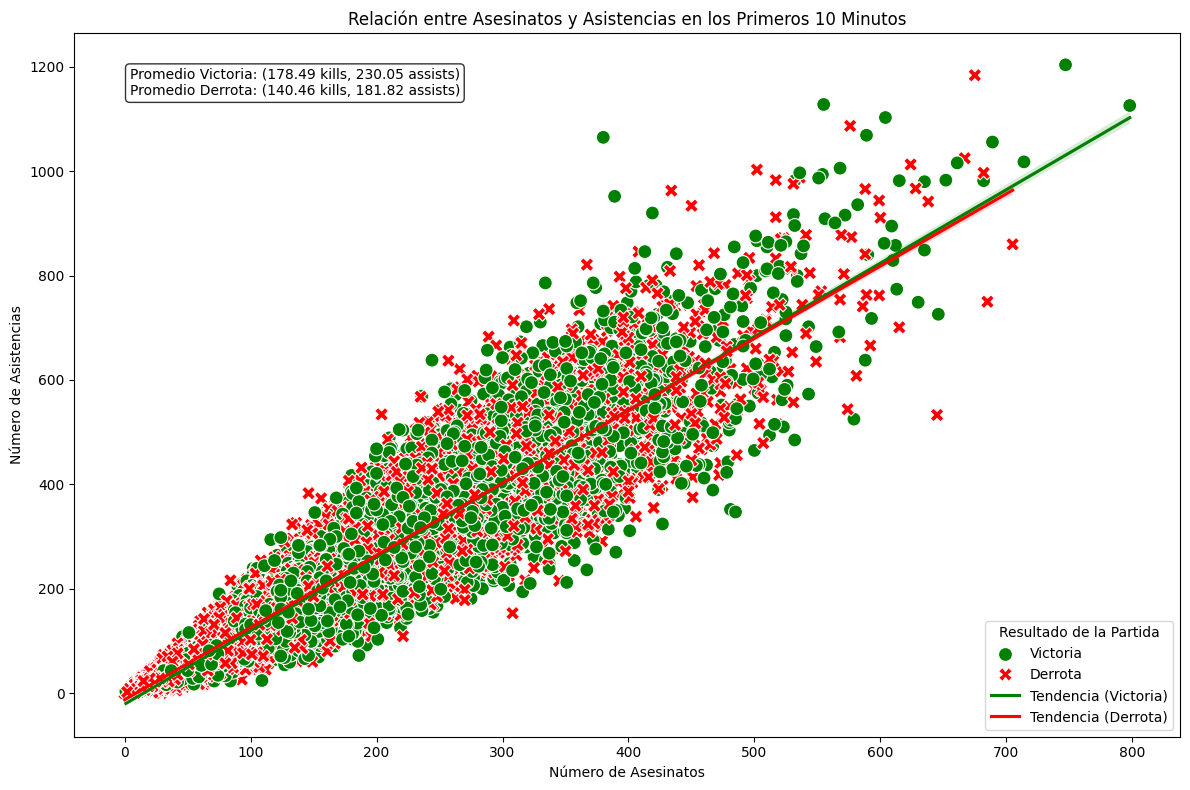

Correlaciones para partidas ganadas:
            kills   assists
kills    1.000000  0.914643
assists  0.914643  1.000000

Correlaciones para partidas perdidas:
            kills   assists
kills    1.000000  0.939336
assists  0.939336  1.000000

Prueba t para kills: t-statistic = 31.4574, p-value = 0.0000
Prueba t para assists: t-statistic = 26.5089, p-value = 0.0000


In [13]:
# Filtrar los datos para los primeros 10 minutos (600 segundos)
df_early = df[df['frame'] <= 600]

# Agrupar por 'gameId' y sumar kills, assists y hasWon
early_game_stats = df_early.groupby('gameId').agg({
    'kills': 'sum',
    'assists': 'sum',
    'hasWon': 'sum'
}).reset_index()

# Determinar si la partida fue ganada o perdida
early_game_stats['Resultado'] = early_game_stats['hasWon'].apply(lambda x: 'Victoria' if x > 0 else 'Derrota')

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=early_game_stats, x='kills', y='assists', hue='Resultado', 
                          style='Resultado', s=100, palette={'Victoria': 'green', 'Derrota': 'red'})

# Añadir una línea de regresión para cada grupo
sns.regplot(data=early_game_stats[early_game_stats['Resultado'] == 'Victoria'], 
            x='kills', y='assists', scatter=False, color='green', label='Tendencia (Victoria)')
sns.regplot(data=early_game_stats[early_game_stats['Resultado'] == 'Derrota'], 
            x='kills', y='assists', scatter=False, color='red', label='Tendencia (Derrota)')

plt.title('Relación entre Asesinatos y Asistencias en los Primeros 10 Minutos')
plt.xlabel('Número de Asesinatos')
plt.ylabel('Número de Asistencias')
plt.legend(title='Resultado de la Partida')

# Añadir texto con estadísticas
victoria = early_game_stats[early_game_stats['Resultado'] == 'Victoria']
derrota = early_game_stats[early_game_stats['Resultado'] == 'Derrota']

stats_text = f"Promedio Victoria: ({victoria['kills'].mean():.2f} kills, {victoria['assists'].mean():.2f} assists)\n"
stats_text += f"Promedio Derrota: ({derrota['kills'].mean():.2f} kills, {derrota['assists'].mean():.2f} assists)"

plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Calcular y mostrar correlaciones
print("Correlaciones para partidas ganadas:")
print(victoria[['kills', 'assists']].corr())
print("\nCorrelaciones para partidas perdidas:")
print(derrota[['kills', 'assists']].corr())

# Realizar prueba t para kills y assists
from scipy import stats

t_stat_kills, p_value_kills = stats.ttest_ind(victoria['kills'], derrota['kills'])
t_stat_assists, p_value_assists = stats.ttest_ind(victoria['assists'], derrota['assists'])

print(f"\nPrueba t para kills: t-statistic = {t_stat_kills:.4f}, p-value = {p_value_kills:.4f}")
print(f"Prueba t para assists: t-statistic = {t_stat_assists:.4f}, p-value = {p_value_assists:.4f}")

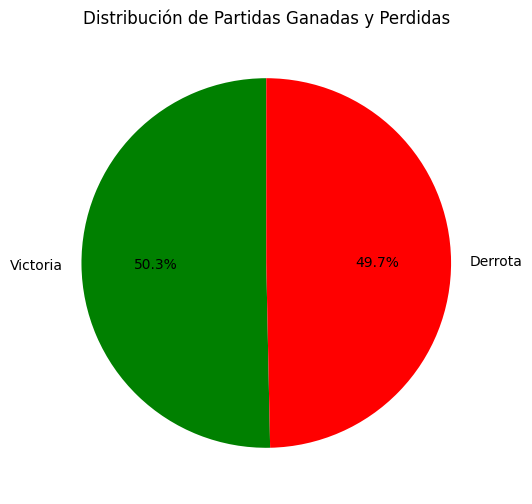

In [14]:
df_last_frame = df.loc[df.groupby('gameId')['frame'].idxmax()]

#Calcular la distribución de victorias y derrotas directamente
victorias = df_last_frame['hasWon'].sum()
derrotas = len(df_last_frame) - victorias

#Preparar los datos para el gráfico de pastel
labels = ['Victoria', 'Derrota']
sizes = [victorias, derrotas]
colors = ['green', 'red']  # 'green' para victorias y 'red' para derrotas

#Crear el gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución de Partidas Ganadas y Perdidas')
plt.ylabel('')
plt.show()


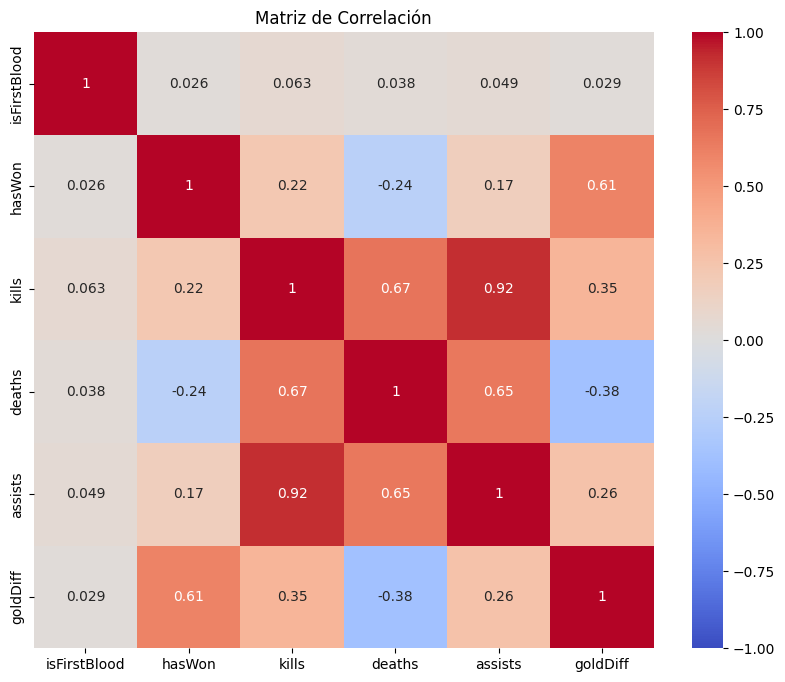

In [15]:
# Correlación entre variables relevantes
correlation_vars = ['isFirstBlood', 'hasWon', 'kills', 'deaths', 'assists', 'goldDiff']
correlation_matrix = df[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.show()


## **Fase 3: Data Preparation**

Para trabajar en la preparación de los datos, se llevará a cabo la limpieza y el procesamiento de acuerdo con las necesidades específicas de cada hípotesis.

### **¿Cómo afectan los objetivos neutrales (Dragones, Barón y Heraldo) a la victoria del equipo?**

In [2]:
#    Selecciona las columnas relevantes del DataFrame.
def columnas_utilizadas(df: pd.DataFrame) -> pd.DataFrame:
    
    # Definir las columnas relevantes
    columns = ['gameId', 'hasWon','frame', 'killedFireDrake', 'killedWaterDrake', 'killedAirDrake', 
               'killedEarthDrake', 'killedElderDrake', 'lostFireDrake', 'lostWaterDrake', 
               'lostAirDrake', 'lostEarthDrake', 'lostElderDrake', 'killedBaronNashor', 
               'lostBaronNashor', 'killedRiftHerald', 'lostRiftHerald']
    
    # Seleccionar las columnas relevantes
    df_relevant = df[columns]
    
    return df_relevant

df_cp = df.copy()

df_usar = columnas_utilizadas(df_cp)

df_usar.head()


,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald
0,4546233126,1,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,4546233126,1,12,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,4546233126,1,14,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,4546233126,1,16,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,4546233126,1,18,1,0,0,1,0,0,1,0,0,0,0,0,0,1


In [3]:
# Seleciona el ultimo frame de tiempo de cada partida para tener los valores finales de cada columna
def seleccion_ultimo_frame(df: pd.DataFrame) -> pd.DataFrame:

    df_last_frame = df.loc[df.groupby('gameId')['frame'].idxmax()]
    
    return df_last_frame

df_ultimo_frame = seleccion_ultimo_frame(df_usar)

# Mostrar el DataFrame resultante
df_ultimo_frame.head()

,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald
186421,4357970300,1,34,0,1,1,1,0,0,0,2,0,0,2,0,1,1
176926,4357978575,0,26,0,0,0,0,0,2,0,1,1,0,0,1,0,2
122571,4358313595,0,24,1,0,1,0,0,0,2,0,0,0,0,1,0,2
233782,4358316661,0,20,0,0,0,0,0,1,1,1,0,0,0,0,1,1
200223,4358361767,1,26,2,0,1,1,0,0,0,0,0,0,1,0,1,0


In [4]:
#    Genera nuevas variables a partir de los objetivos neutrales.

def nuevas_columnas(df: pd.DataFrame) -> pd.DataFrame:
    
    df['totalDragonsKilled'] = (df['killedFireDrake'] + df['killedWaterDrake'] + 
                                df['killedAirDrake'] + df['killedEarthDrake'] +
                                df['killedElderDrake'])
    df['totalDragonsLost'] = (df['lostFireDrake'] + df['lostWaterDrake'] + 
                              df['lostAirDrake'] + df['lostEarthDrake'] + 
                              df['lostElderDrake'])
    df['totalObjectivesKilled'] = (df['killedBaronNashor'] + df['killedRiftHerald'])
    df['totalObjectivesLost'] = (df['lostBaronNashor'] + df['lostRiftHerald'])
    
    return df

df_ncolum = nuevas_columnas(df_ultimo_frame)
df_ncolum.head()

,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,...,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,totalDragonsKilled,totalDragonsLost,totalObjectivesKilled,totalObjectivesLost
186421,4357970300,1,34,0,1,1,1,0,0,0,...,0,0,2,0,1,1,3,2,3,1
176926,4357978575,0,26,0,0,0,0,0,2,0,...,1,0,0,1,0,2,0,4,0,3
122571,4358313595,0,24,1,0,1,0,0,0,2,...,0,0,0,1,0,2,2,2,0,3
233782,4358316661,0,20,0,0,0,0,0,1,1,...,0,0,0,0,1,1,0,3,1,1
200223,4358361767,1,26,2,0,1,1,0,0,0,...,0,0,1,0,1,0,4,0,2,0


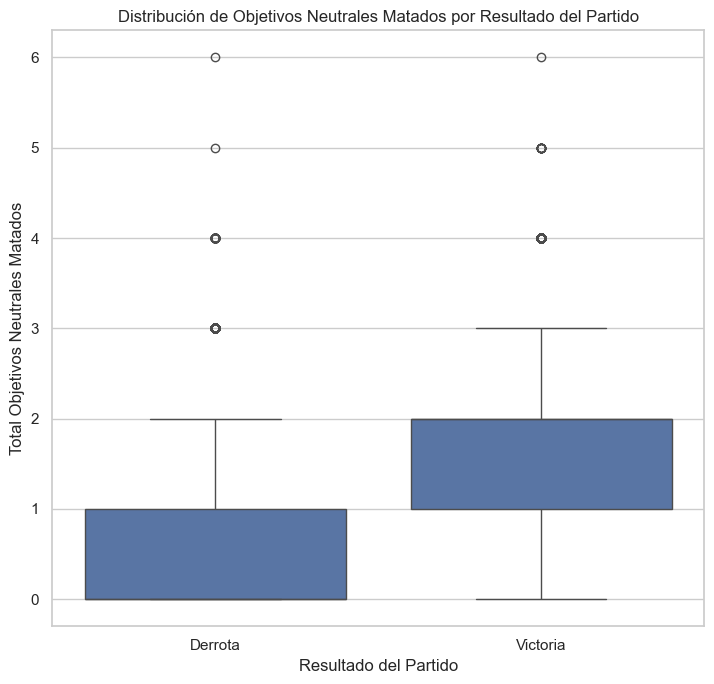

In [5]:
#    Crea un gráfico para visualizar la distribución de objetivos neutrales matados por resultado del partido.

def grafico_wins_neutrales(df: pd.DataFrame) -> None:

    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(14, 7))
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='hasWon', y='totalObjectivesKilled', data=df)
    
    # Personalizar los ejes y el título
    plt.title('Distribución de Objetivos Neutrales Matados por Resultado del Partido')
    plt.xlabel('Resultado del Partido')
    plt.ylabel('Total Objetivos Neutrales Matados')
    
    plt.xticks(ticks=[0, 1], labels=['Derrota', 'Victoria'])
    
    plt.tight_layout()
    plt.show()

grafico_wins_neutrales(df_ultimo_frame)


In [6]:
#Calcula el promedio y la desviación estándar para los objetivos neutrales.

def calcular_estadisticas(df: pd.DataFrame) -> pd.DataFrame:
    
 
    columnas = ['killedFireDrake', 'killedWaterDrake', 'killedAirDrake',
                'killedEarthDrake', 'killedElderDrake', 'lostFireDrake',
                'lostWaterDrake', 'lostAirDrake', 'lostEarthDrake', 'lostElderDrake',
                'killedBaronNashor', 'lostBaronNashor', 'killedRiftHerald', 
                'lostRiftHerald','totalDragonsKilled','totalObjectivesKilled',
                'totalDragonsLost','totalObjectivesLost']
    
    # Calcular el promedio y la desviación estándar
    estadisticas = {
        'Promedio': df[columnas].mean(),
        'Desviación Estándar': df[columnas].std()
    }
    
    # Crear un DataFrame para las estadísticas
    df_estadisticas = pd.DataFrame(estadisticas)
    
    return df_estadisticas

# Suponiendo que df_with_features es tu DataFrame con datos relevantes
df_estadisticas = calcular_estadisticas(df_ultimo_frame)
print(df_estadisticas)


                       Promedio  Desviación Estándar
killedFireDrake        0.451549             0.647978
killedWaterDrake       0.459136             0.656009
killedAirDrake         0.456487             0.651417
killedEarthDrake       0.461103             0.658937
killedElderDrake       0.025450             0.166413
lostFireDrake          0.462749             0.658301
lostWaterDrake         0.477079             0.663024
lostAirDrake           0.471299             0.661526
lostEarthDrake         0.480170             0.674587
lostElderDrake         0.027015             0.170341
killedBaronNashor      0.428468             0.611155
lostBaronNashor        0.479006             0.639356
killedRiftHerald       0.749037             0.730657
lostRiftHerald         0.869099             0.739101
totalDragonsKilled     1.853725             1.335691
totalObjectivesKilled  1.177505             1.018260
totalDragonsLost       1.918312             1.363175
totalObjectivesLost    1.348105             1.

In [7]:
#    Calcula la correlación entre los objetivos neutrales y el resultado del partido.
def calcular_correlacion_con_victorias(df: pd.DataFrame) -> pd.Series:
    
    correlaciones = df_ultimo_frame.corr()['hasWon'].sort_values(ascending=False)
    return correlaciones

correlaciones = calcular_correlacion_con_victorias(df_ultimo_frame)
print(correlaciones)


hasWon                   1.000000
totalDragonsKilled       0.570796
totalObjectivesKilled    0.495964
killedBaronNashor        0.440796
killedRiftHerald         0.322485
killedFireDrake          0.299475
killedWaterDrake         0.292733
killedEarthDrake         0.288305
killedAirDrake           0.263026
killedElderDrake         0.090164
gameId                   0.006712
frame                   -0.031334
lostElderDrake          -0.106398
lostAirDrake            -0.271083
lostEarthDrake          -0.301090
lostWaterDrake          -0.308672
lostFireDrake           -0.310071
lostRiftHerald          -0.322799
lostBaronNashor         -0.484368
totalObjectivesLost     -0.518164
totalDragonsLost        -0.593717
Name: hasWon, dtype: float64


#Detecta outliers en el DataFrame basado en el z-score.
def detectar_outliers_z_score(df, columnas, umbral=3):    

    outliers_totales = pd.DataFrame()
    
    for col in columnas:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers_columna = df[z_scores > umbral]
        
        if not outliers_columna.empty:
            outliers_totales = pd.concat([outliers_totales, outliers_columna], axis=0).drop_duplicates()
        
        print(f"Outliers para {col} usando z-score:")
        print(outliers_columna)
        print("\n")
    
    return outliers_totales

columnas_a_verificar = ['totalObjectivesKilled']

outliers_detectados = detectar_outliers_z_score(df_ultimo_frame, columnas_a_verificar)

Existen ciertos outliers que podrían tener un impacto en nuestros análisis. Por esta razón, procederemos a realizar un tratamiento de estos valores atípicos para asegurar la integridad y precisión de nuestros resultados.

### **Tratamiento de outliers:**


In [9]:
def eliminar_outliers(df, columna):
    z_scores = stats.zscore(df[columna].dropna())
    
    umbral = 3
    
    outliers = df[abs(z_scores) > umbral]
    
    df_sin_outliers = df[~df[columna].isin(outliers[columna])]
    
    print("DataFrame después de eliminar outliers para '{}':".format(columna))
    print(df_sin_outliers.describe())
    
    return df_sin_outliers

# Ejemplo de uso
df_sin_outliers = eliminar_outliers(df_ultimo_frame, 'totalObjectivesKilled')

DataFrame después de eliminar outliers para 'totalObjectivesKilled':
             gameId        hasWon         frame  killedFireDrake  \
count  2.489600e+04  24896.000000  24896.000000     24896.000000   
mean   4.500423e+09      0.503093     27.465938         0.451438   
std    5.374381e+07      0.500000      6.461489         0.647993   
min    4.357970e+09      0.000000     10.000000         0.000000   
25%    4.460547e+09      0.000000     24.000000         0.000000   
50%    4.528185e+09      1.000000     28.000000         0.000000   
75%    4.543621e+09      1.000000     32.000000         1.000000   
max    4.547671e+09      1.000000     56.000000         4.000000   

       killedWaterDrake  killedAirDrake  killedEarthDrake  killedElderDrake  \
count      24896.000000    24896.000000      24896.000000      24896.000000   
mean           0.458989        0.456138          0.460958          0.025386   
std            0.655783        0.651049          0.658775          0.166236   
mi

In [11]:
#Elimina los outliers de una columna usando el método IQR.
def eliminar_outliers_iqr(df, columna):
    
    # Cálculo del primer y tercer cuartil
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    
    # Rango intercuartílico (IQR)
    IQR = Q3 - Q1
    
    # Límites para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtrado de los datos para eliminar los outliers
    df_sin_outliers = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    
    return df_sin_outliers

# Ejemplo de uso
df_sin_outliers_iqr = eliminar_outliers_iqr(df_ultimo_frame, 'totalObjectivesKilled')


In [15]:
#Reemplaza los outliers de una columna usando KNN en lugar de eliminarlos.
def reemplazar_outliers_knn(df, columna, n_neighbors=5):
    

    # Cálculo del primer y tercer cuartil
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    
    # Rango intercuartílico (IQR)
    IQR = Q3 - Q1
    
    # Límites para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar los outliers (True para valores que son outliers)
    es_outlier = (df[columna] < limite_inferior) | (df[columna] > limite_superior)
    
    # Crear una copia del DataFrame para no modificar el original
    df_copy = df.copy()
    
    # Reemplazar los outliers por NaN
    df_copy.loc[es_outlier, columna] = np.nan
    
    # Aplicar KNN Imputer
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(imputer.fit_transform(df_copy), columns=df_copy.columns)
    
    return df_imputed

df_con_outliers_reemplazados = reemplazar_outliers_knn(df_ultimo_frame, 'totalObjectivesKilled')


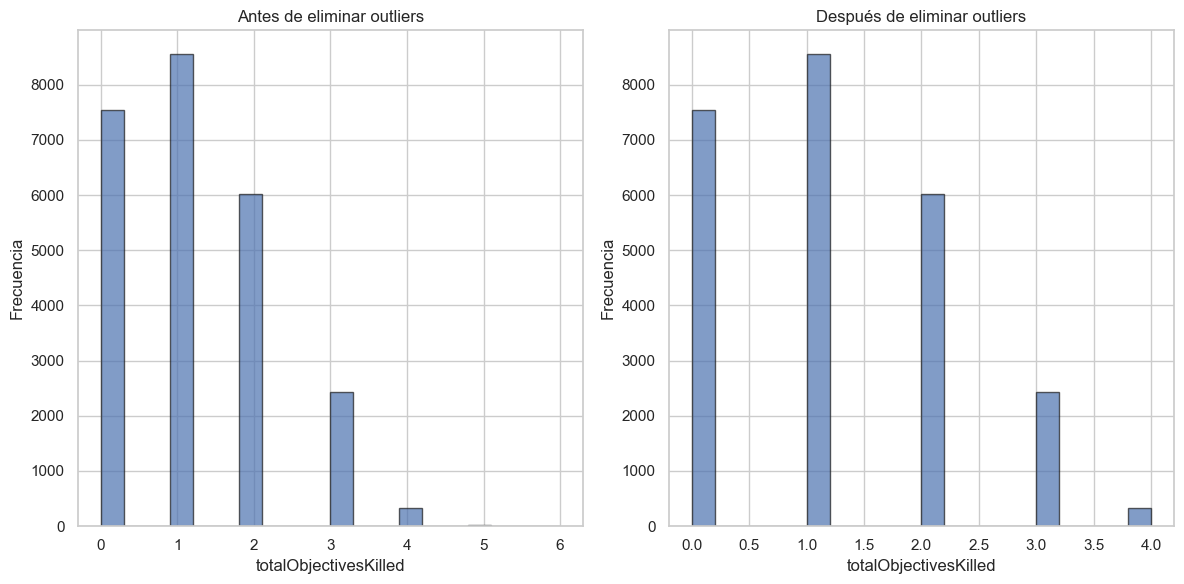

In [13]:
#Genera histogramas para comparar los datos antes y después de eliminar outliers.

def grafico_antes_y_despues(df_before, df_after, column_name):
    

    plt.figure(figsize=(12, 6))

    # Datos antes de eliminar outliers
    plt.subplot(1, 2, 1)
    plt.hist(df_before[column_name], bins=20, edgecolor='k', alpha=0.7)
    plt.title('Antes de eliminar outliers')
    plt.xlabel(column_name)
    plt.ylabel('Frecuencia')

    # Datos después de eliminar outliers
    plt.subplot(1, 2, 2)
    plt.hist(df_after[column_name], bins=20, edgecolor='k', alpha=0.7)
    plt.title('Después de eliminar outliers')
    plt.xlabel(column_name)
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

grafico_antes_y_despues(df_ultimo_frame, df_sin_outliers, 'totalObjectivesKilled')


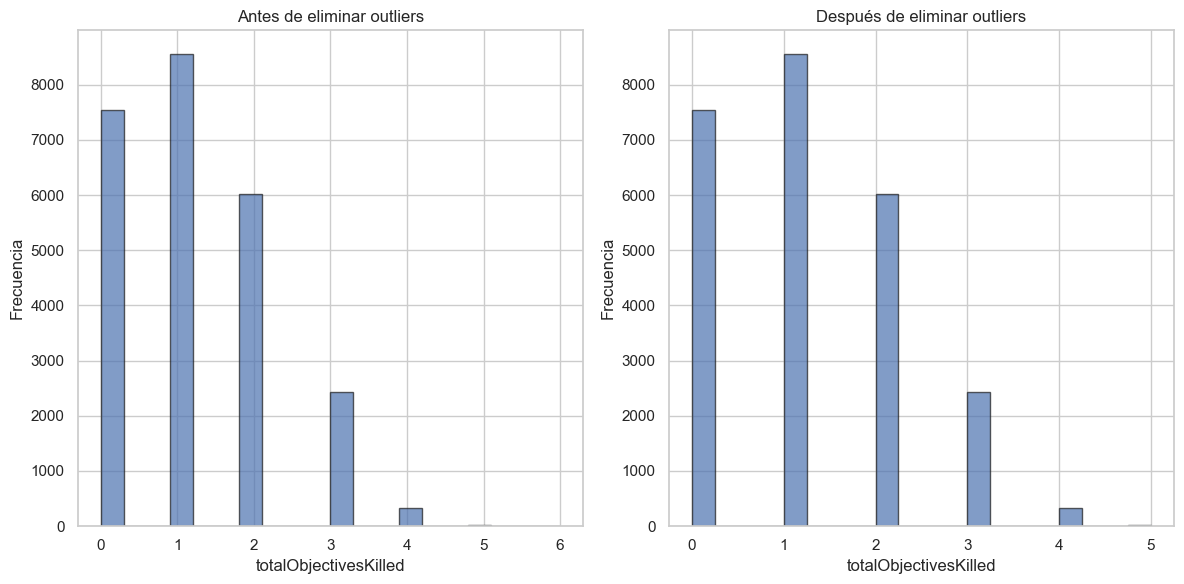

In [14]:
grafico_antes_y_despues(df_ultimo_frame, df_sin_outliers_iqr, 'totalObjectivesKilled')


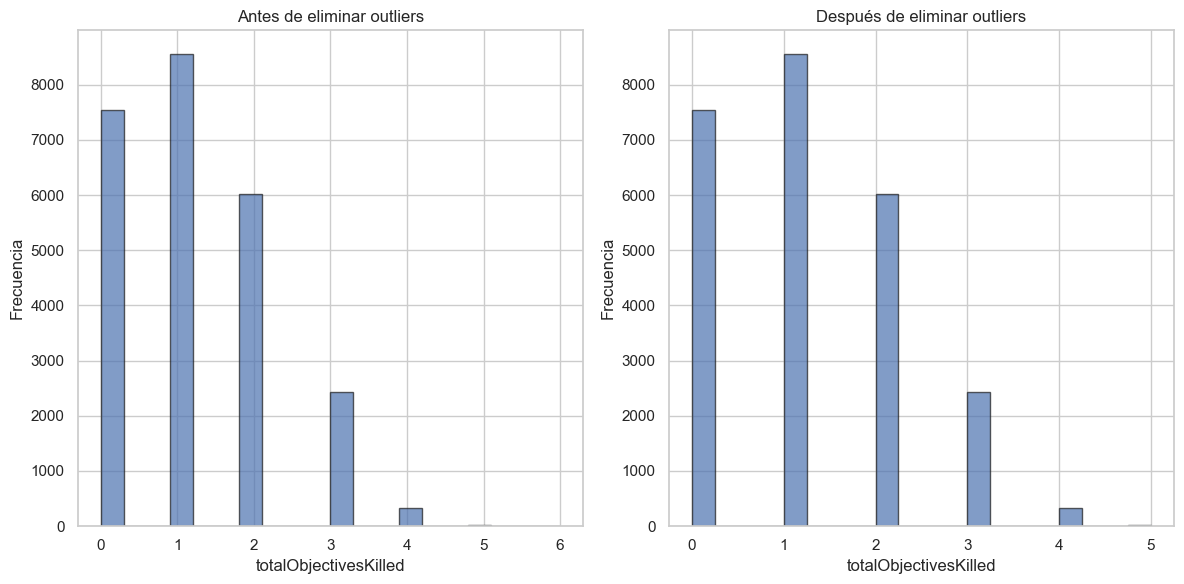

In [16]:
grafico_antes_y_despues(df_ultimo_frame, df_con_outliers_reemplazados, 'totalObjectivesKilled')


### **Resumen:**

Al comparar los métodos (sin tratamiento, eliminación de outliers mediante IQR, reemplazo de outliers con KNN y eliminación utilizando Z-scores), no se observa una diferencia significativa en la distribución de los datos. Incluso con la eliminación de outliers basada en Z-scores, con un umbral de 3, la estructura general de los datos se mantiene. Esto indica que los valores atípicos no tienen un impacto considerable en la distribución, por lo que cualquiera de las estrategias puede ser empleada sin alterar de forma significativa los resultados.

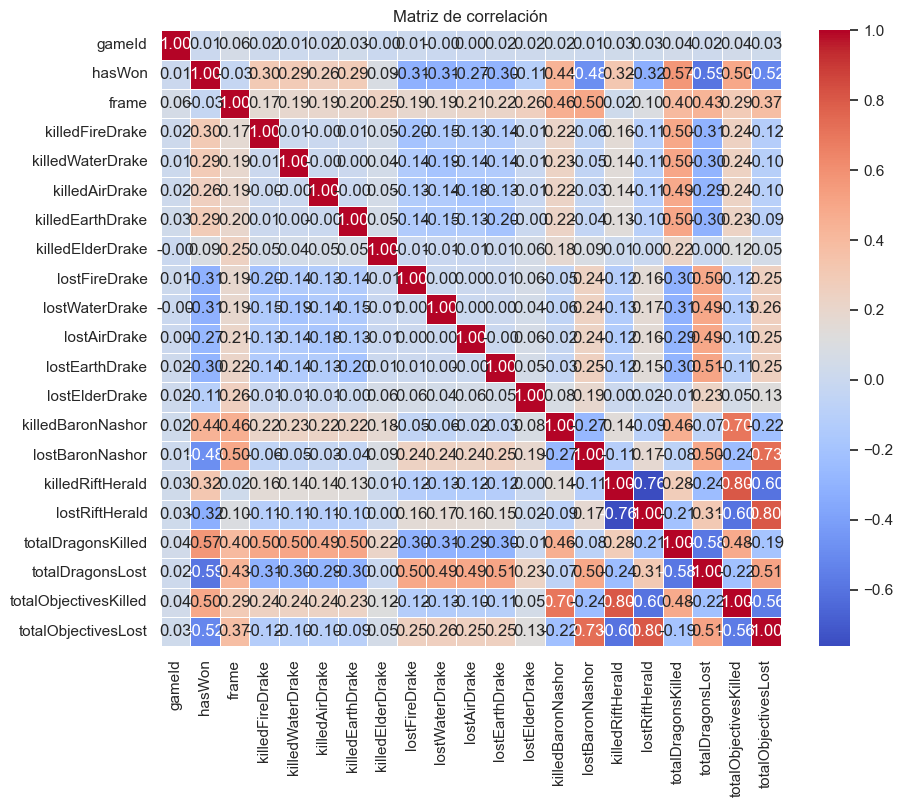

In [17]:
#Genera la matriz del correlación 
def matriz_correlacion (df: pd.DataFrame) -> None:
    correlaciones = df.corr()
    plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura
    sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title('Matriz de correlación')
    plt.show()

matriz_correlacion(df_con_outliers_reemplazados)


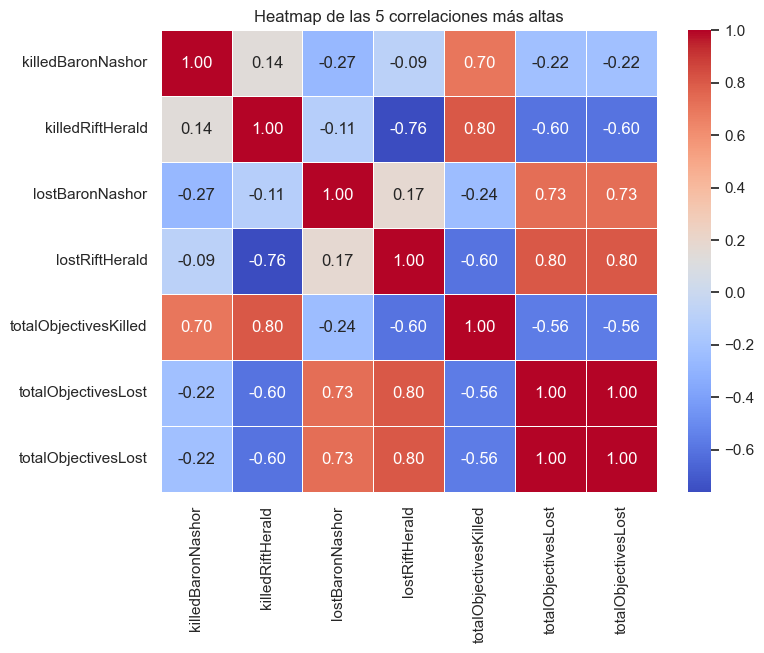

In [26]:
#Genera el heatmap solo con las n correlaciones más altas (absolutas).

def matriz_correlacion_top(df: pd.DataFrame, n: int = 5) -> None:

    # Generar la matriz de correlación
    correlaciones = df.corr()
    
    # Obtener las correlaciones en formato de serie
    correlaciones_abs = correlaciones.abs().unstack()
    
    # Eliminar las correlaciones de una variable consigo misma (diagonal)
    correlaciones_abs = correlaciones_abs[correlaciones_abs < 1]
    
    # Ordenar las correlaciones en orden descendente
    correlaciones_mayores = correlaciones_abs.sort_values(ascending=False).drop_duplicates()
    
    # Tomar las n correlaciones más altas
    top_correlaciones = correlaciones_mayores.head(n)
    
    # Obtener las variables involucradas en las correlaciones más altas
    variables_involucradas = top_correlaciones.index.get_level_values(0).union(
        top_correlaciones.index.get_level_values(1)
    )
    
    # Filtrar la matriz de correlación solo con las variables involucradas
    correlaciones_filtradas = df[variables_involucradas].corr()
    
    # Mostrar el heatmap solo con las n correlaciones más altas
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlaciones_filtradas, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f'Heatmap de las {n} correlaciones más altas')
    plt.show()

matriz_correlacion_top(df_con_outliers_reemplazados)


### **Resumen:**

Después de este análisis de los objetivos neutrales, se puede apreciar que los dragones tienen una correlación más fuerte con el resultado de la partida en comparación con otros objetivos. Esta relación destacada sugiere que el asesinato de dragones tiene un impacto significativo en las posibilidades de victoria. Por lo tanto, hemos decidido enfocar nuestro análisis en la victoria en función de estos objetivos, dada su relevancia y su influencia en el resultado final de las partidas.

### **¿Cómo afectan los dragones a la victoria del equipo?**

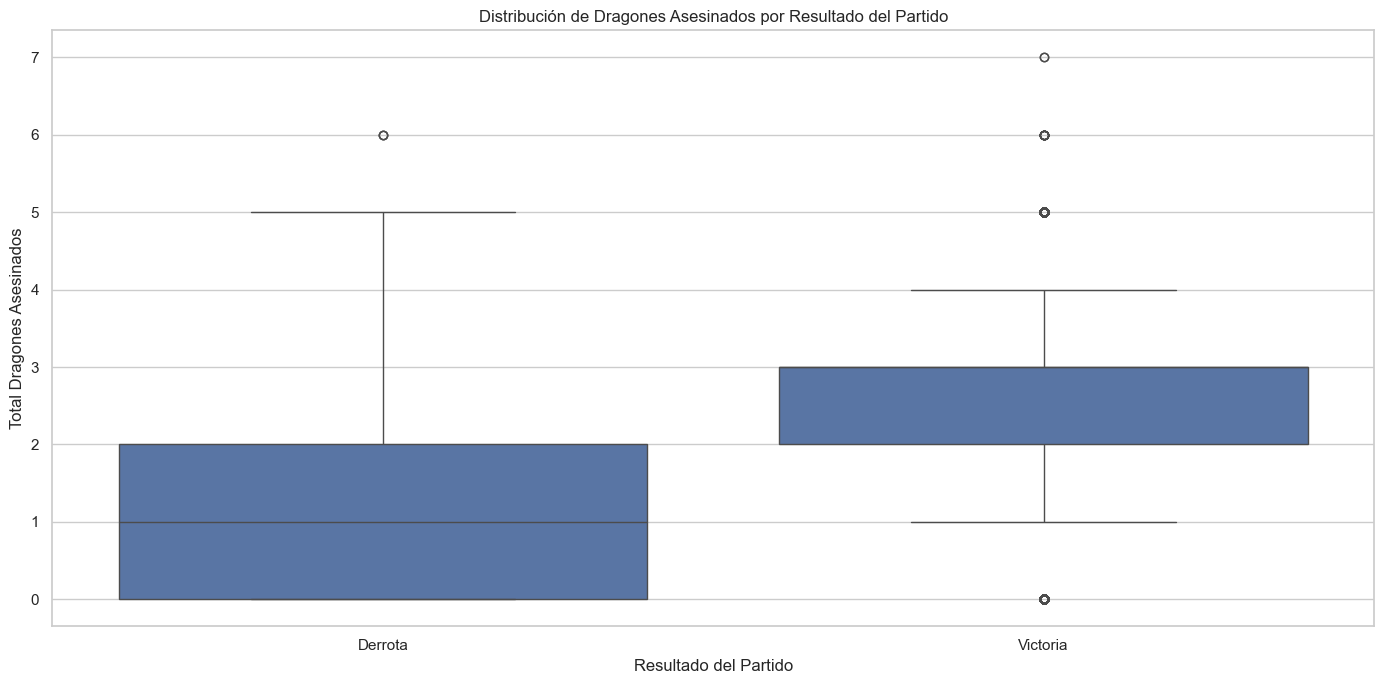

In [18]:
def grafico_wins_dragon(df: pd.DataFrame) -> None:
    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(14, 7))
    
    # Solo un gráfico
    sns.boxplot(x='hasWon', y='totalDragonsKilled', data=df)
    
    # Personalizar los ejes y el título
    plt.title('Distribución de Dragones Asesinados por Resultado del Partido')
    plt.xlabel('Resultado del Partido')
    plt.ylabel('Total Dragones Asesinados')
    
    plt.xticks(ticks=[0, 1], labels=['Derrota', 'Victoria'])
    
    plt.tight_layout()
    plt.show()

# Llamar a la función con el dataframe
grafico_wins_dragon(df_con_outliers_reemplazados)

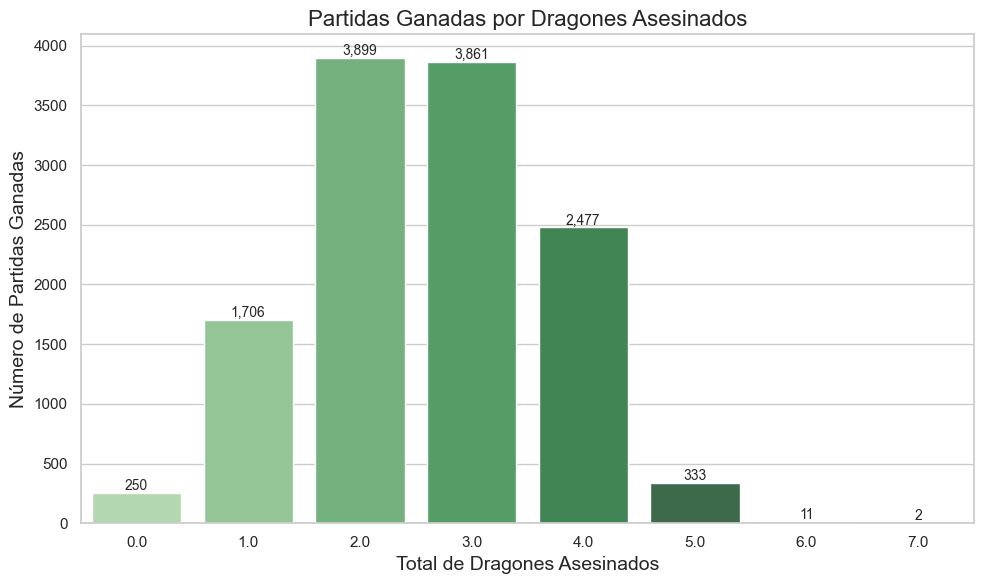

In [19]:
def grafico_partidas_ganadas_dragones(df: pd.DataFrame) -> None:
    sns.set_theme(style="whitegrid")
    
    # Agrupar por el número de dragones asesinados y contar las victorias
    df_wins_by_dragons = df[df['hasWon'] == 1].groupby('totalDragonsKilled').size().reset_index(name='partidas_ganadas')
    
    plt.figure(figsize=(10, 6))
    
    ax = sns.barplot(x='totalDragonsKilled', y='partidas_ganadas', data=df_wins_by_dragons, 
                     hue='totalDragonsKilled', palette='Greens_d', legend=False)
    
    for index, row in df_wins_by_dragons.iterrows():
        ax.text(row.name, row['partidas_ganadas'], f'{row["partidas_ganadas"]:,.0f}', 
                ha='center', va='bottom', fontsize=10)
    
    # Personalizar el gráfico
    plt.title('Partidas Ganadas por Dragones Asesinados', fontsize=16)
    plt.xlabel('Total de Dragones Asesinados', fontsize=14)
    plt.ylabel('Número de Partidas Ganadas', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Llamar a la función con el DataFrame
grafico_partidas_ganadas_dragones(df_con_outliers_reemplazados)

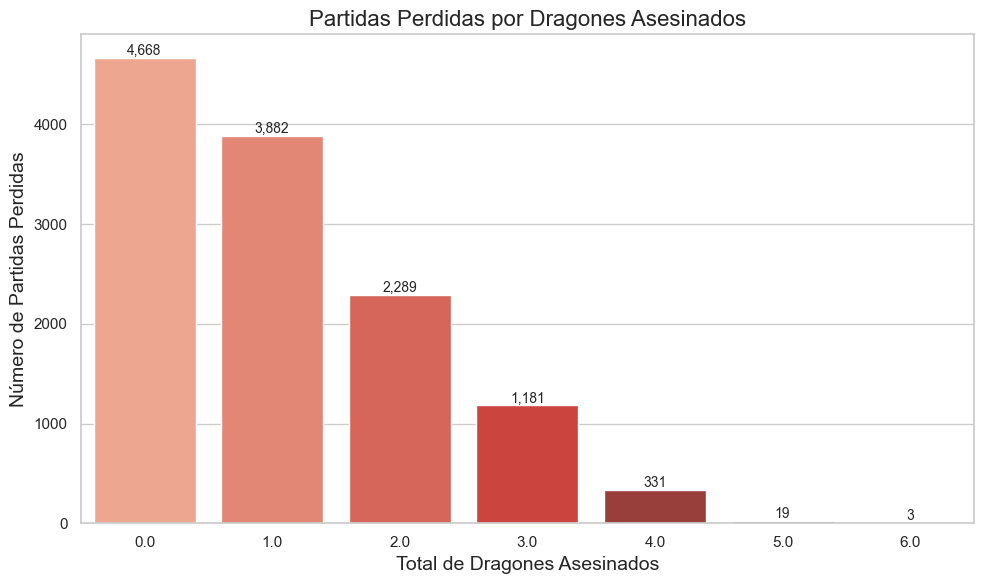

In [20]:
def grafico_partidas_perdidas_dragones(df: pd.DataFrame) -> None:
    sns.set_theme(style="whitegrid")
    
    # Agrupar por el número de dragones asesinados y contar las derrotas
    df_losses_by_dragons = df[df['hasWon'] == 0].groupby('totalDragonsKilled').size().reset_index(name='partidas_perdidas')
    
    plt.figure(figsize=(10, 6))
    
    ax = sns.barplot(x='totalDragonsKilled', y='partidas_perdidas', data=df_losses_by_dragons, 
                     hue='totalDragonsKilled', palette='Reds_d', legend=False)
    
    for index, row in df_losses_by_dragons.iterrows():
        ax.text(row.name, row['partidas_perdidas'], f'{row["partidas_perdidas"]:,.0f}', 
                ha='center', va='bottom', fontsize=10)
    
    plt.title('Partidas Perdidas por Dragones Asesinados', fontsize=16)
    plt.xlabel('Total de Dragones Asesinados', fontsize=14)
    plt.ylabel('Número de Partidas Perdidas', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Llamar a la función con el DataFrame
grafico_partidas_perdidas_dragones(df_con_outliers_reemplazados)

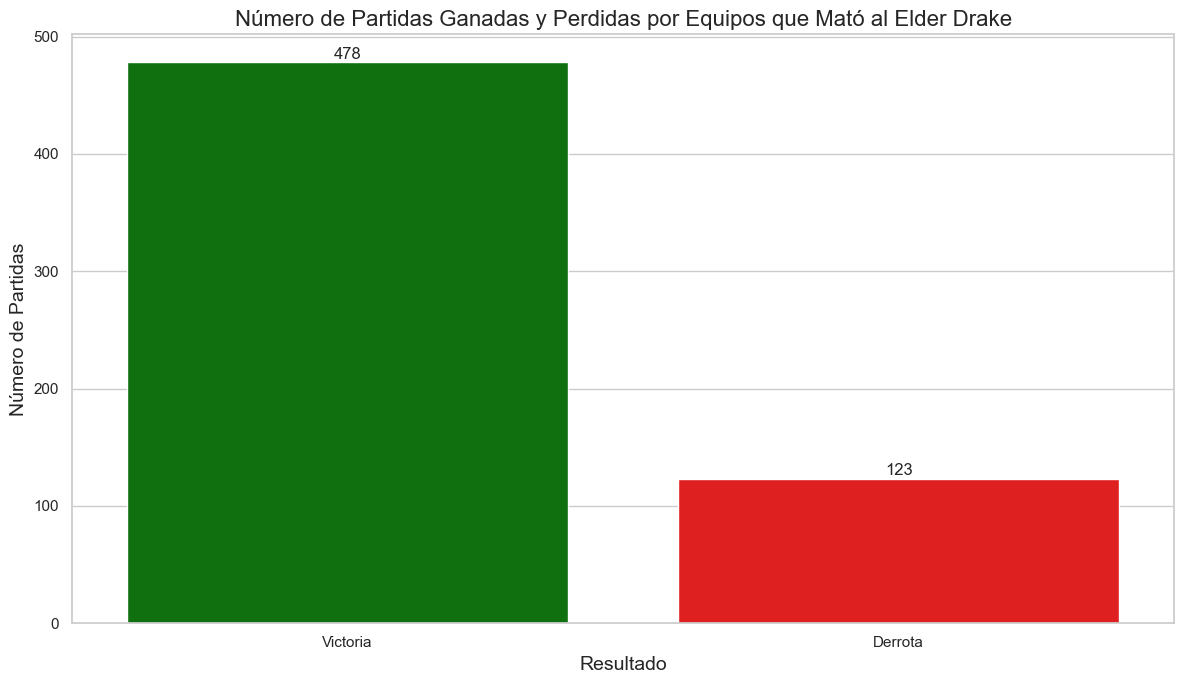

In [21]:

# Victorias y derrotas por Elder Drake
def grafico_barras_victorias_derrotas_elder_drake(df: pd.DataFrame) -> None:
    df_elder = df[df['killedElderDrake'] > 0]
    
    # Contar el número de partidas ganadas y perdidas
    conteo_resultados = df_elder['hasWon'].value_counts().reset_index()
    conteo_resultados.columns = ['hasWon', 'Número de Partidas']
    
    # Mapear 'hasWon' a etiquetas
    conteo_resultados['Resultado'] = conteo_resultados['hasWon'].map({1: 'Victoria', 0: 'Derrota'})
    
    # Configurar el estilo de seaborn
    sns.set_theme(style="whitegrid")
    
    # Crear la figura y los ejes
    plt.figure(figsize=(12, 7))
    
    # Crear el gráfico de barras con hue
    ax = sns.barplot(x='Resultado', y='Número de Partidas', data=conteo_resultados,
                     hue='Resultado', palette={'Victoria': 'green', 'Derrota': 'red'}, legend=False)
    
    # Añadir etiquetas de texto encima de las barras
    for i, row in conteo_resultados.iterrows():
        ax.text(i, row['Número de Partidas'] + 0.5,  
                f'{row["Número de Partidas"]}', 
                ha='center', va='bottom', fontsize=12)
    
    # Configurar títulos y etiquetas
    plt.title('Número de Partidas Ganadas y Perdidas por Equipos que Mató al Elder Drake', fontsize=16)
    plt.xlabel('Resultado', fontsize=14)
    plt.ylabel('Número de Partidas', fontsize=14)
    
    plt.tight_layout()
    plt.show()

grafico_barras_victorias_derrotas_elder_drake(df_con_outliers_reemplazados)


### **Resumen:**
Los datos muestran que existe una relación directa entre la obtención de objetivos neutrales y la victoria en una partida. Matar objetivos clave como el Heraldo de la Grieta y los dragones (fuego, agua, aire y tierra) está fuertemente asociado con una mayor probabilidad de ganar. Dentro de estos objetivos, los dragones asesinados tienen la mayor correlación con la victoria. Sin embargo, en partidas que se extienden por mucho tiempo, el Elder Drake se convierte en un objetivo crucial que puede definir el resultado final de la partida. La pérdida de estos objetivos tiene un impacto negativo significativo en las posibilidades de victoria.

### **¿El numero de asesinatos (Kills) y asistencias (Assist) durante los primeros 10 minutos (frame) tiene un impacto significativo en la victoria de un equipo?**

In [49]:
def filtrar_juego_temprano(df, limite_tiempo=10):
    """
    Filtra los datos para considerar solo los primeros 10 minutos (600 segundos) de cada partida.
    
    :param df: DataFrame con los datos del juego
    :param limite_tiempo: Límite de tiempo en segundos (por defecto 600 para 10 minutos)
    :return: DataFrame filtrado
    """
    return df[df['frame'] <= limite_tiempo]


In [50]:
df_temprano = filtrar_juego_temprano(df)
df_temprano.head()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
14,4402345420,1790000,1,10,-155,-113,-0.2,0,1,0,...,0,0,0,0,7,5,5,14,3,2
25,4546761795,2065000,0,10,2307,96,0.2,0,1,0,...,0,0,0,0,6,3,8,11,1,1
38,4528965743,1307000,0,10,-3297,-2882,-0.6,0,1,0,...,0,0,0,0,3,6,2,11,1,1


In [51]:
# Definimos la función
def agregar_estadisticas_juego(df):
    """
    Agrega las estadísticas por juego, sumando asesinatos, asistencias y determinando el resultado.
    
    :param df: DataFrame con los datos filtrados del juego
    :return: DataFrame con estadísticas agregadas por juego
    """
    estadisticas_agrupadas = df.groupby('gameId').agg({
        'kills': 'sum',
        'assists': 'sum',
        'hasWon': 'max'  # Asumimos que 'hasWon' es constante para cada gameId
    }).reset_index()
    
    estadisticas_agrupadas['Resultado'] = estadisticas_agrupadas['hasWon'].map({1: 'Victoria', 0: 'Derrota'})
    return estadisticas_agrupadas

In [52]:
df_agrupado = agregar_estadisticas_juego(df_temprano)
df_agrupado.head()

,gameId,kills,assists,hasWon,Resultado
0,4357970300,4,5,1,Victoria
1,4357978575,7,7,0,Derrota
2,4358313595,3,4,0,Derrota
3,4358316661,8,7,0,Derrota
4,4358361767,8,8,1,Victoria


In [53]:
def crear_ratios_caracteristicas(df):
    """
    Crea características adicionales basadas en ratios de asesinatos y asistencias.
    
    :param df: DataFrame con estadísticas agregadas por juego
    :return: DataFrame con características adicionales
    """
    df['ratio_asesinatos_asistencias'] = df['kills'] / (df['assists'] + 1)  # Evitamos división por cero
    df['acciones_totales'] = df['kills'] + df['assists']
    return df


In [54]:
df_caracteristicas = crear_ratios_caracteristicas(df_agrupado)
df_caracteristicas.head()

,gameId,kills,assists,hasWon,Resultado,ratio_asesinatos_asistencias,acciones_totales
0,4357970300,4,5,1,Victoria,0.666667,9
1,4357978575,7,7,0,Derrota,0.875000,14
2,4358313595,3,4,0,Derrota,0.600000,7
3,4358316661,8,7,0,Derrota,1.000000,15
4,4358361767,8,8,1,Victoria,0.888889,16


In [55]:
def manejar_valores_faltantes(df):
    """
    Maneja los valores faltantes en el DataFrame.
    
    :param df: DataFrame con posibles valores faltantes
    :return: DataFrame con valores faltantes imputados
    """
    # Seleccionamos solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Imputamos los valores faltantes en las columnas numéricas
    imputador = SimpleImputer(strategy='mean')
    df[columnas_numericas] = imputador.fit_transform(df[columnas_numericas])
    
    return df

In [56]:
df_imputado = manejar_valores_faltantes(df_caracteristicas)
df_imputado.head()

,gameId,kills,assists,hasWon,Resultado,ratio_asesinatos_asistencias,acciones_totales
0,4.357970e+09,4.0,5.0,1.0,Victoria,0.666667,9.0
1,4.357979e+09,7.0,7.0,0.0,Derrota,0.875000,14.0
2,4.358314e+09,3.0,4.0,0.0,Derrota,0.600000,7.0
3,4.358317e+09,8.0,7.0,0.0,Derrota,1.000000,15.0
4,4.358362e+09,8.0,8.0,1.0,Victoria,0.888889,16.0


In [57]:
def escalar_caracteristicas(df):
    """
    Escala las características numéricas del DataFrame.
    
    :param df: DataFrame con características sin escalar
    :return: DataFrame con características escaladas
    """
    escalador = StandardScaler()
    caracteristicas_numericas = ['kills', 'assists', 'ratio_asesinatos_asistencias', 'acciones_totales']
    df[caracteristicas_numericas] = escalador.fit_transform(df[caracteristicas_numericas])
    return df


In [58]:
df_escalado = escalar_caracteristicas(df_imputado)
df_escalado.head()

,gameId,kills,assists,hasWon,Resultado,ratio_asesinatos_asistencias,acciones_totales
0,4.357970e+09,-0.640008,-0.208304,1.0,Victoria,-0.626495,-0.417883
1,4.357979e+09,0.393341,0.320997,0.0,Derrota,-0.164453,0.372021
2,4.358314e+09,-0.984457,-0.472955,0.0,Derrota,-0.774349,-0.733845
3,4.358317e+09,0.737790,0.320997,0.0,Derrota,0.112773,0.530002
4,4.358362e+09,0.737790,0.585648,1.0,Victoria,-0.133650,0.687983


In [59]:
def codificar_variables_categoricas(df):
    """
    Codifica variables categóricas.
    
    :param df: DataFrame con variables categóricas
    :return: DataFrame con variables categóricas codificadas
    """
    df = pd.get_dummies(df, columns=['Resultado'], drop_first=True)
    return df


In [60]:
df_codificado = codificar_variables_categoricas(df_escalado)
df_codificado.head()

,gameId,kills,assists,hasWon,ratio_asesinatos_asistencias,acciones_totales,Resultado_Victoria
0,4.357970e+09,-0.640008,-0.208304,1.0,-0.626495,-0.417883,True
1,4.357979e+09,0.393341,0.320997,0.0,-0.164453,0.372021,False
2,4.358314e+09,-0.984457,-0.472955,0.0,-0.774349,-0.733845,False
3,4.358317e+09,0.737790,0.320997,0.0,0.112773,0.530002,False
4,4.358362e+09,0.737790,0.585648,1.0,-0.133650,0.687983,True


In [61]:
def preparar_datos(df, limite_tiempo=10):
    """
    Función principal que ejecuta todo el proceso de preparación de datos.
    
    :param df: DataFrame original con todos los datos del juego
    :param limite_tiempo: Límite de tiempo para filtrar el juego temprano
    :return: DataFrame preparado para el análisis o modelado
    """
    df_temprano = filtrar_juego_temprano(df, limite_tiempo)
    df_agrupado = agregar_estadisticas_juego(df_temprano)
    df_caracteristicas = crear_ratios_caracteristicas(df_agrupado)
    df_imputado = manejar_valores_faltantes(df_caracteristicas)
    df_escalado = escalar_caracteristicas(df_imputado)
    df_codificado = codificar_variables_categoricas(df_escalado)
    
    return df_codificado

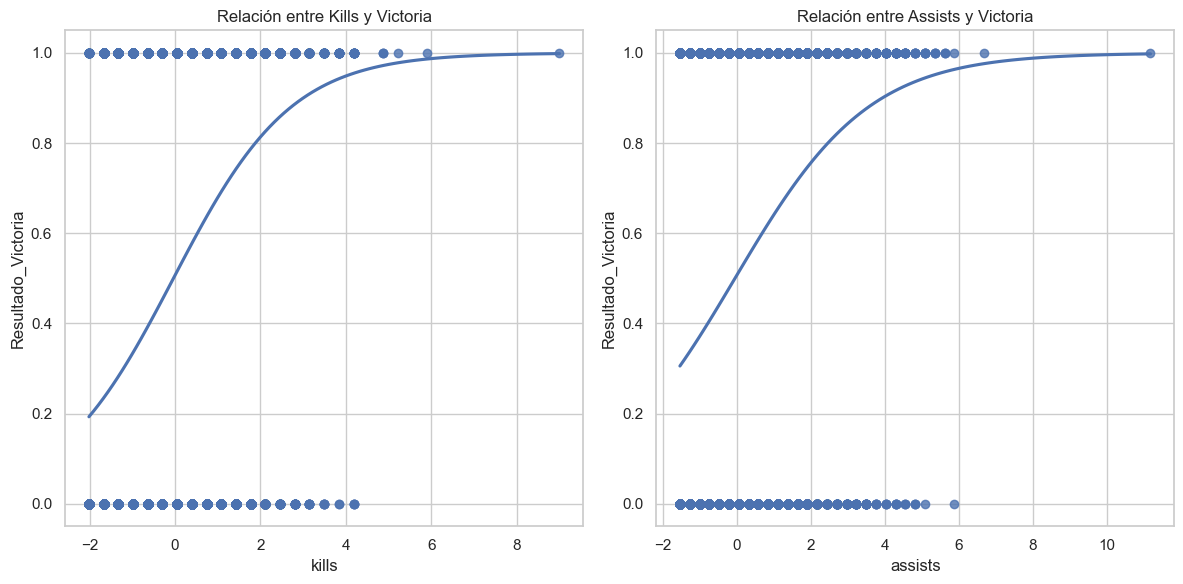

In [62]:
def graficar_correlacion(df):
    """
    Crea un gráfico de dispersión con regresión para visualizar la relación entre las kills,
    assists y el resultado (Victoria o Derrota) en los primeros 10 minutos de juego.
    
    :param df: DataFrame con los datos preparados
    """
    # Aseguramos que 'Resultado_Victoria' esté en formato numérico
    if 'Resultado_Victoria' not in df.columns:
        df['Resultado_Victoria'] = df['hasWon']
    
    # Creamos un gráfico de dispersión para 'kills' y 'assists' separados por 'Resultado'
    plt.figure(figsize=(12, 6))
    
    # Graficamos la relación entre kills y el resultado
    plt.subplot(1, 2, 1)
    sns.regplot(x='kills', y='Resultado_Victoria', data=df, logistic=True, ci=None)
    plt.title('Relación entre Kills y Victoria')
    
    # Graficamos la relación entre assists y el resultado
    plt.subplot(1, 2, 2)
    sns.regplot(x='assists', y='Resultado_Victoria', data=df, logistic=True, ci=None)
    plt.title('Relación entre Assists y Victoria')
    
    plt.tight_layout()
    plt.show()

# Ejecutamos el flujo de preparación de datos y graficamos la correlación
df_preparado = preparar_datos(df, limite_tiempo=10)
graficar_correlacion(df_preparado)

### **Resumen:**



el número de asesinatos (kills) y asistencias (assists) durante los primeros 10 minutos del juego parece tener un impacto significativo en la probabilidad de victoria del equipo. A medida que los valores de "kills" y "assists" aumentan, la probabilidad de victoria se incrementa de manera notable.

### **¿El equipo que obtiene una ventaja en asesinatos y asistencias en los primeros 10 minutos tiene una mayor probabilidad de ampliar esa ventaja a lo largo de la partida?**



In [63]:
def filtrar_juego_temprano_snowball(df, limite_tiempo=10):
    """
    Filtra los datos para considerar solo los primeros 10 minutos de cada partida.
    """
    return df[df['frame'] <= limite_tiempo]

df_temprano_snowball = filtrar_juego_temprano_snowball(df)
df_temprano_snowball.head()


,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
14,4402345420,1790000,1,10,-155,-113,-0.2,0,1,0,...,0,0,0,0,7,5,5,14,3,2
25,4546761795,2065000,0,10,2307,96,0.2,0,1,0,...,0,0,0,0,6,3,8,11,1,1
38,4528965743,1307000,0,10,-3297,-2882,-0.6,0,1,0,...,0,0,0,0,3,6,2,11,1,1


In [64]:
def agregar_estadisticas_snowball(df):
    """
    Agrega estadísticas como kills, asistencias, diferencia de oro y experiencia por juego.
    
    :param df: DataFrame filtrado del juego
    :return: DataFrame con estadísticas agregadas por juego
    """
    estadisticas_snowball = df.groupby('gameId').agg({
        'kills': 'sum',
        'assists': 'sum',
        'goldDiff': 'sum',
        'expDiff': 'sum',
        'hasWon': 'max'  # Asumimos que 'hasWon' es constante para cada gameId
    }).reset_index()

    estadisticas_snowball['Resultado'] = estadisticas_snowball['hasWon'].map({1: 'Victoria', 0: 'Derrota'})
    return estadisticas_snowball

df_agrupado_snowball = agregar_estadisticas_snowball(df_temprano_snowball)
df_agrupado_snowball.head()


,gameId,kills,assists,goldDiff,expDiff,hasWon,Resultado
0,4357970300,4,5,-1046,-1694,1,Victoria
1,4357978575,7,7,-1948,-2395,0,Derrota
2,4358313595,3,4,-685,-455,0,Derrota
3,4358316661,8,7,1044,2717,0,Derrota
4,4358361767,8,8,478,852,1,Victoria


In [65]:
def crear_ratios_snowball(df):
    """
    Crea características adicionales basadas en diferencias de oro y experiencia.
    
    :param df: DataFrame con estadísticas agregadas por juego
    :return: DataFrame con características adicionales
    """
    df['ratio_oro_experiencia'] = df['goldDiff'] / (df['expDiff'] + 1)  # Evitamos división por cero
    return df

df_caracteristicas_snowball = crear_ratios_snowball(df_agrupado_snowball)
df_caracteristicas_snowball.head()


,gameId,kills,assists,goldDiff,expDiff,hasWon,Resultado,ratio_oro_experiencia
0,4357970300,4,5,-1046,-1694,1,Victoria,0.617838
1,4357978575,7,7,-1948,-2395,0,Derrota,0.813701
2,4358313595,3,4,-685,-455,0,Derrota,1.508811
3,4358316661,8,7,1044,2717,0,Derrota,0.384106
4,4358361767,8,8,478,852,1,Victoria,0.560375


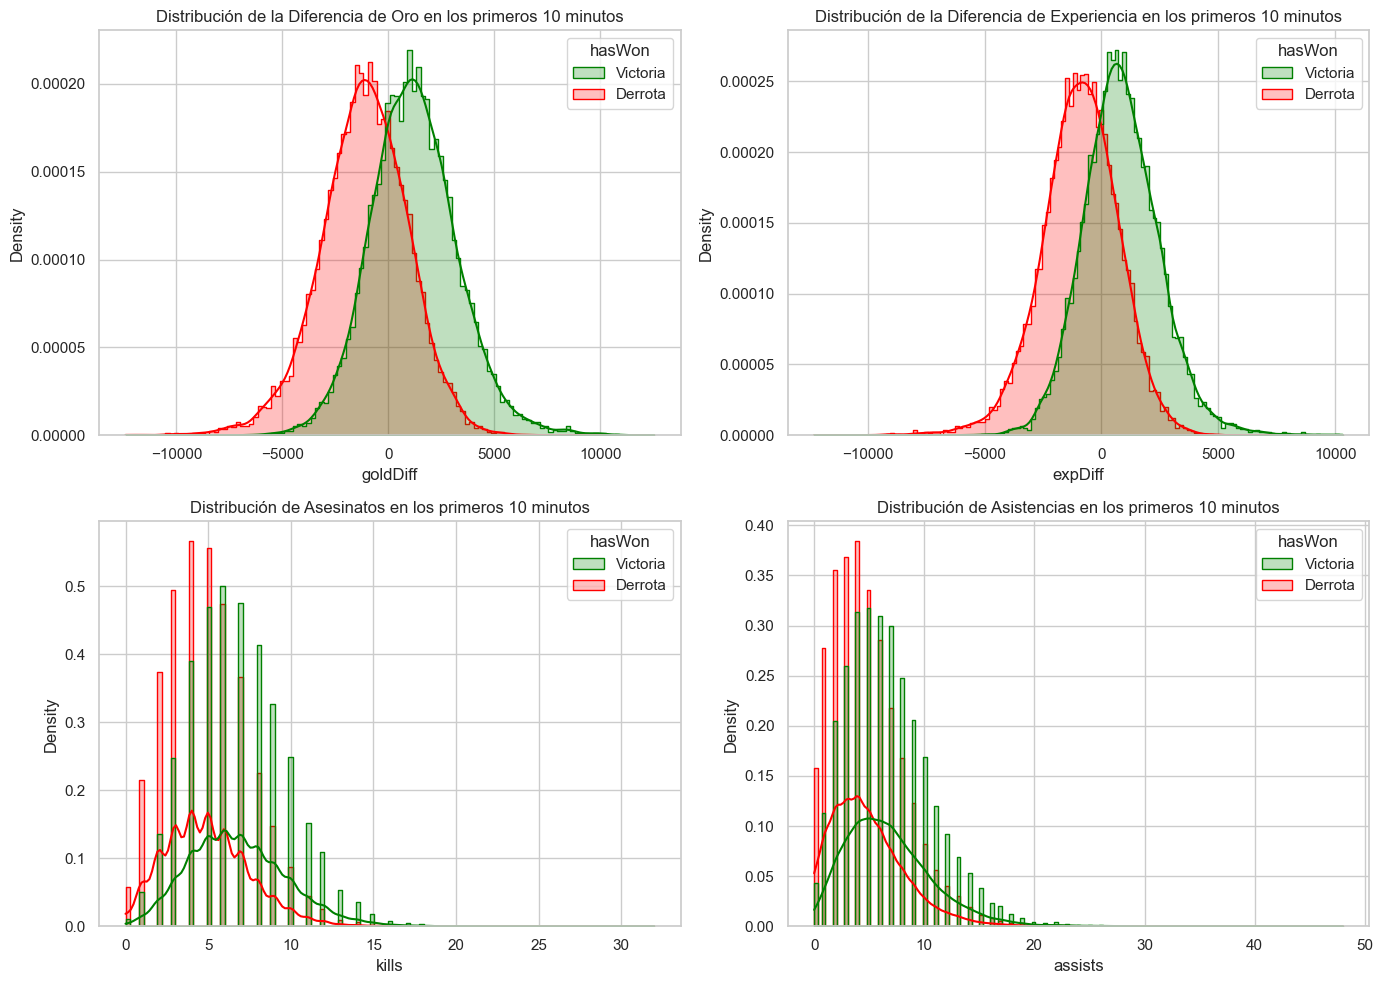

In [66]:
def graficar_histogramas_snowball(df, limite_tiempo=10):
    """
    Función que filtra los datos para los primeros minutos de la partida y genera histogramas
    para visualizar cómo se distribuyen las ventajas tempranas en función de si el equipo ganó o perdió la partida.
    Las métricas consideradas son:
    - Diferencia de oro (goldDiff)
    - Diferencia de experiencia (expDiff)
    - Asesinatos (kills)
    - Asistencias (assists)
    
    Parámetros:
    - df (DataFrame): DataFrame con los datos de la partida.
    - limite_tiempo (int): Límite de tiempo en minutos para considerar como juego temprano (default: 10 minutos).
    """
    
    # Filtrar los datos para los primeros minutos
    df_temprano = filtrar_juego_temprano_snowball(df, limite_tiempo).copy()

    # Mapear los valores de 'hasWon' a etiquetas de texto
    df_temprano['hasWon'] = df_temprano['hasWon'].map({0: 'Derrota', 1: 'Victoria'})

    # Colores para las secciones del gráfico
    colors = {'Derrota': 'red', 'Victoria': 'green'}

    plt.figure(figsize=(14, 10))

    # Histograma de diferencia de oro
    plt.subplot(2, 2, 1)
    sns.histplot(data=df_temprano, x='goldDiff', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribución de la Diferencia de Oro en los primeros {limite_tiempo} minutos')

    # Histograma de diferencia de experiencia
    plt.subplot(2, 2, 2)
    sns.histplot(data=df_temprano, x='expDiff', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribución de la Diferencia de Experiencia en los primeros {limite_tiempo} minutos')

    # Histograma de asesinatos
    plt.subplot(2, 2, 3)
    sns.histplot(data=df_temprano, x='kills', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribución de Asesinatos en los primeros {limite_tiempo} minutos')

    # Histograma de asistencias
    plt.subplot(2, 2, 4)
    sns.histplot(data=df_temprano, x='assists', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribución de Asistencias en los primeros {limite_tiempo} minutos')

    plt.tight_layout()
    plt.show()

# Llamada a la función con los datos y el límite de tiempo de 10 minutos
graficar_histogramas_snowball(df, limite_tiempo=10)


In [67]:
def preparar_datos_snowball(df, limite_tiempo=10):
    """
    Función que coordina todo el flujo de preparación de datos: filtrar por tiempo, agregar estadísticas y generar ratios.
    
    :param df: DataFrame original
    :param limite_tiempo: Límite de tiempo para filtrar los primeros 10 minutos
    :return: DataFrame final con estadísticas procesadas
    """
    df_temprano = filtrar_juego_temprano_snowball(df, limite_tiempo)
    df_agrupado = agregar_estadisticas_snowball(df_temprano)
    df_caracteristicas = crear_ratios_snowball(df_agrupado)
    return df_caracteristicas

df_preparado_snowball = preparar_datos_snowball(df)
df_preparado_snowball.head()



,gameId,kills,assists,goldDiff,expDiff,hasWon,Resultado,ratio_oro_experiencia
0,4357970300,4,5,-1046,-1694,1,Victoria,0.617838
1,4357978575,7,7,-1948,-2395,0,Derrota,0.813701
2,4358313595,3,4,-685,-455,0,Derrota,1.508811
3,4358316661,8,7,1044,2717,0,Derrota,0.384106
4,4358361767,8,8,478,852,1,Victoria,0.560375


### **Resumen:**


La diferencia de oro (goldDiff) y la diferencia de experiencia (expDiff) en los primeros 10 minutos del juego parecen ser factores clave que afectan el resultado de una partida. Los equipos que logran obtener una mayor ventaja en oro y experiencia durante este tiempo tienden a tener una probabilidad más alta de ganar. Además, los asesinatos (kills) y asistencias (assists) en esta etapa temprana del juego también están correlacionados con el éxito posterior, ya que los equipos que logran asegurar más eliminaciones y colaboraciones tempranas tienen una tendencia mayor a consolidar la ventaja y llevarse la victoria.

### **¿Conseguir la Primera Sangre incrementa las posibilidades de ganar la partida?**

In [68]:
def victorias_isFirsBlood(df):
    """
    Calcula la proporción de victorias con y sin Primera Sangre.

    """
    proportions = df.groupby('isFirstBlood')['hasWon'].value_counts(normalize=True).unstack()
    proportions.columns = ['Perdió', 'Ganó']
    return proportions

# Uso de la función
victorias_isFirsBlood(df)

,Perdió,Ganó
isFirstBlood,,
0,0.849850,0.150150
1,0.501393,0.498607


In [69]:
def comparar_winrate(df):
    #usamos la libreria scipy para poder ocupar la funcion chi2_contingency y ver la relacion entre variables categoricas
    contingency_table = pd.crosstab(df['isFirstBlood'], df['hasWon'])
    """
        medimos la diferencia entre las frecuencias observadas y esperadas 
        en las categorías "isFirstBlood" y "hasWon"
    
    """
    chi2, p, _, _ = stats.chi2_contingency(contingency_table) 
    win_rates = victorias_isFirsBlood(df) 
    
    return {
        'win_rates': win_rates,
        'chi2_statistic': chi2,
        'p_value': p
    }

comparar_winrate(df)

{'win_rates':                 Perdió      Ganó
 isFirstBlood                    
 0             0.849850  0.150150
 1             0.501393  0.498607,
 'chi2_statistic': np.float64(160.12350232509974),
 'p_value': np.float64(1.06332158366944e-36)}

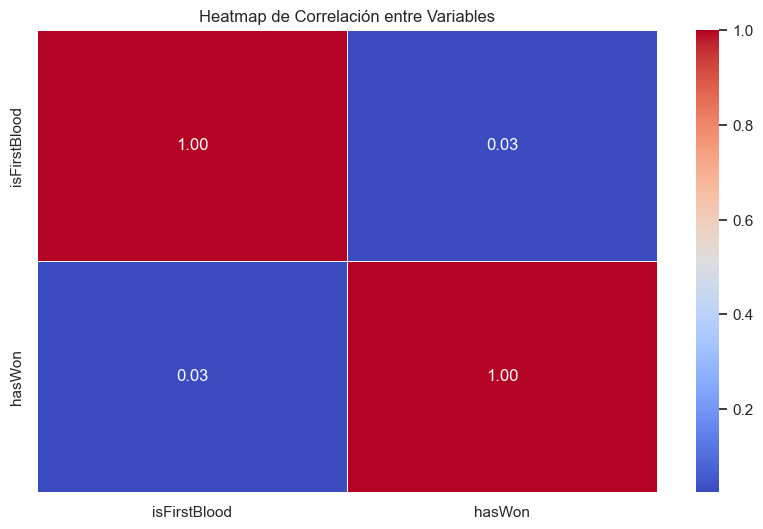

              isFirstBlood    hasWon
isFirstBlood      1.000000  0.025804
hasWon            0.025804  1.000000


In [71]:
def heatmap(df):

    # Seleccionamos las variables relevantes para el heatmap
    relevant_columns = ['isFirstBlood', 'hasWon']
    correlation_matrix = df[relevant_columns].corr()
    plt.figure(figsize=(10, 6))
    
    # Generamos el heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Heatmap de Correlación entre Variables')
    plt.show()

    print(correlation_matrix)


heatmap(df)

### **Resumen:**


Segun el analisis, los equipos que obtienen la Primera Sangre tienen una tasa de victorias significativamente mayor (49.86%) en comparacion con los equipos que no la obtienen (15.02%). El valor p (1.06e-36) y el estadistico Chi-Square (160.12) confirman que la correlacion entre isFirstBlood y hasWOn es estadísticamente significativa, a pesar de que la correlación es baja (0.026). Como resultado, obtener la Primera Sangre aumenta significativamente las posibilidades de ganar, a pesar de que el heatmap muestra una correlación baja.